In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.style.use('seaborn-dark-palette')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})

In [25]:
# Normalization

def normalize(df):
    df_norm = df.copy()
    s0 = df_norm .iloc[:,1:]
    df_norm.iloc[:,1:] = abs((s0 - s0.min()) / (s0.max() - s0.min()))
    return df_norm

# Gas 

In [4]:
gas = pd.read_excel("../data/gas/natural_gas_consumption.xlsx")
gas

,Year,Total
0,2013,4291
1,2014,4822
2,2015,5279
3,2016,5721
4,2017,5198
5,2018,5611
6,2019,5393
7,2020,5573


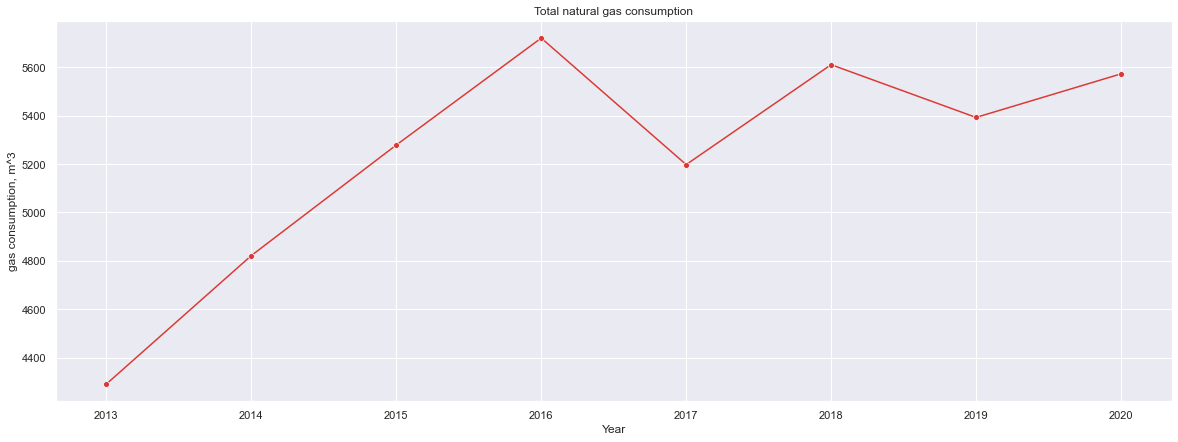

In [11]:
sns.set(rc={'figure.figsize': (20, 7)})
plot = sns.lineplot(x=gas['Year'], y=gas['Total'], marker = 'o', color='#db3a34')

plot.set_ylabel("gas consumption, m^3")
plot.set_title("Total natural gas consumption")
plt.savefig('../charts/gas/natural_gas_consumption.png')
plt.show(block=True)

In [12]:
gas_per_inhabitant = pd.read_excel("../data/gas/per_inhabitant.xlsx")
gas_per_inhabitant 

,Year,Consumption(ratio m3/inhabitant)
0,2013,123.2
1,2014,139.7
2,2015,154.4
3,2016,168.8
4,2017,154.2
5,2018,166.9
6,2019,160.5
7,2020,163.2


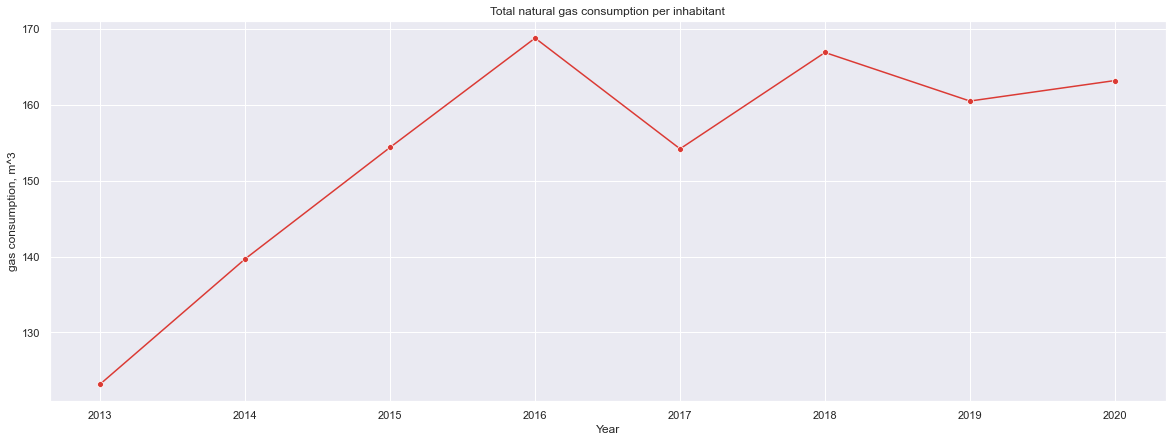

In [13]:
sns.set(rc={'figure.figsize': (20, 7)})
plot = sns.lineplot(x=gas_per_inhabitant['Year'], y=gas_per_inhabitant['Consumption(ratio m3/inhabitant)'], marker = 'o', color='#db3a34')

plot.set_ylabel("gas consumption, m^3")
plot.set_title("Total natural gas consumption per inhabitant")
plt.savefig('../charts/gas/natural_gas_consumption_per_inhabitant.png')
plt.show(block=True)

# Fuel

In [14]:
fuel = pd.read_excel("../data/gas/fuel_sales_for_consumption_tonne.xlsx")
fuel

,Year,Butane,Propane,Liquid Petroleum Gas,Lead-free petrol 95,Lead-free petrol 98,Fuel diesel,Coloured diesel,Heating diesel,Other petroleum,Fuel
0,2013,382,1040,24,2699,358,17572,2327,895,3,3
1,2014,383,1009,6,2609,309,16236,2621,651,4,4
2,2015,344,963,5,2736,251,15083,2665,638,10,10
3,2016,320,996,1,2101,178,13862,2156,625,35,35
4,2017,323,904,0,2151,203,14232,1629,483,1,1
5,2018,312,932,1,2127,183,13435,1980,469,1,1
6,2019,286,1014,5,2259,200,14385,2538,465,1,1
7,2020,304,912,20,2209,275,13298,2733,655,1,1


In [26]:
fuel_norm = normalize(fuel)
fuel_norm

,Year,Butane,Propane,Liquid Petroleum Gas,Lead-free petrol 95,Lead-free petrol 98,Fuel diesel,Coloured diesel,Heating diesel,Other petroleum,Fuel
0,2013,0.989691,1.000000,1.000000,0.941732,1.000000,1.000000,0.632246,1.000000,0.058824,0.058824
1,2014,1.000000,0.772059,0.250000,0.800000,0.727778,0.687412,0.898551,0.432558,0.088235,0.088235
2,2015,0.597938,0.433824,0.208333,1.000000,0.405556,0.417642,0.938406,0.402326,0.264706,0.264706
3,2016,0.350515,0.676471,0.041667,0.000000,0.000000,0.131961,0.477355,0.372093,1.000000,1.000000
4,2017,0.381443,0.000000,0.000000,0.078740,0.138889,0.218531,0.000000,0.041860,0.000000,0.000000
5,2018,0.268041,0.205882,0.041667,0.040945,0.027778,0.032054,0.317935,0.009302,0.000000,0.000000
6,2019,0.000000,0.808824,0.208333,0.248819,0.122222,0.254328,0.823370,0.000000,0.000000,0.000000
7,2020,0.185567,0.058824,0.833333,0.170079,0.538889,0.000000,1.000000,0.441860,0.000000,0.000000


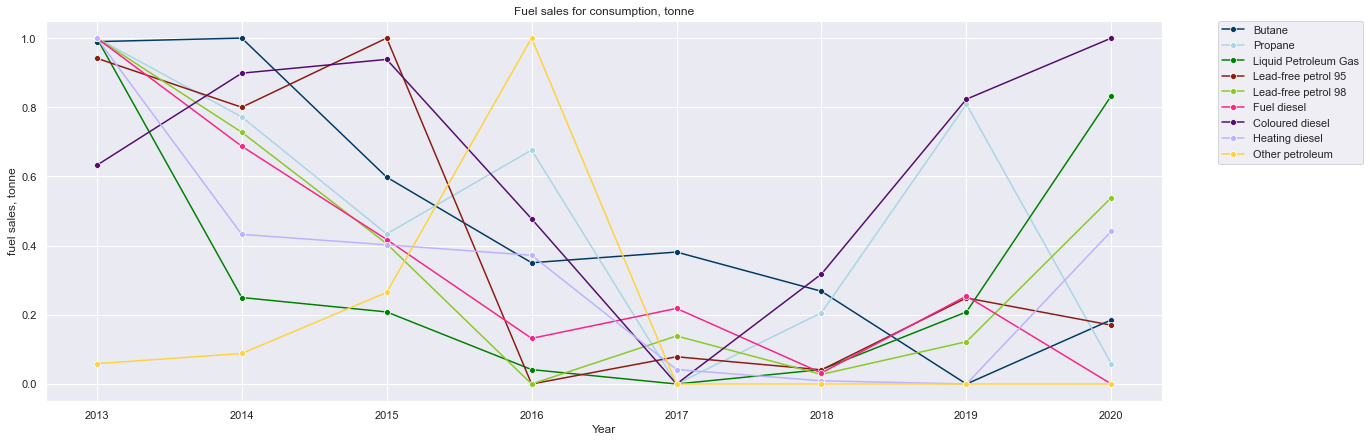

In [27]:
sns.set(rc={'figure.figsize': (20, 7)})
firstPlot = sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Butane'], label="Butane", marker = 'o', color='#013a63')
sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Propane'], ax=firstPlot,  label="Propane", marker = 'o', color='#a9d6e5')
sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Liquid Petroleum Gas'], ax=firstPlot,  label="Liquid Petroleum Gas", marker = 'o', color='#008000')
sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Lead-free petrol 95'], ax=firstPlot,  label="Lead-free petrol 95", marker = 'o', color='#8c1c13')
sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Lead-free petrol 98'], ax=firstPlot,  label="Lead-free petrol 98", marker = 'o', color='#8ac926')
sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Fuel diesel'], ax=firstPlot,  label="Fuel diesel", marker = 'o', color='#f72585')
sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Coloured diesel'], ax=firstPlot,  label="Coloured diesel", marker = 'o', color='#540d6e')
sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Heating diesel'], ax=firstPlot,  label="Heating diesel", marker = 'o', color='#bdb2ff')
sns.lineplot(x=fuel_norm['Year'], y=fuel_norm['Other petroleum'], ax=firstPlot,  label="Other petroleum", marker = 'o', color='#ffd23f').set_title("Fuel sales for consumption, tonne")

plt.ylabel('fuel sales, tonne')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.savefig('../charts/gas/fuel_sales.png')
plt.show(block=True)